<center><h1>Classification Analysis of The Impact of Sex and Native Country on Education Level Based on the KNN Algorithm</h1></center>

In [2]:
set.seed(1)

library(tidyverse)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)
library(cowplot)
source('tests.R')
source("cleanup.R")
options(repr.matrix.max.rows = 6)

show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0  # avoid dark pixel in top left
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


<center><h2>Introduction</h2></center>
Inequality in educational attainment is a prevalent issue all over the world. A multitude of factors contribute to this disparity in overall education including Sex, Race, and Native Country. This results in large gaps in education level.
<h4>Question Being Answered</h4>
Given a persons sex, race, and native country, what is their education level?

<h4>Sex</h4>
According to Pamela Herd et al. (2019), women's educational attainment fell behind men's for decades due to institutional constraints and gender discrimination. Many socially-constructed norms that define men and women greatly influence drop-out rates, with many women being out of school a lot earlier than men (Sida, 2017). By increasing opportunities for women in the labor force and embracing cultural changes, women's educational attainment increased greatly. Moreover, in the past, many gender barriers were in place to skew post-secondary admissions and discriminate against women from achieving a higher level education (Herd et al., 2019). In recent studies, it has been found that women in developing countries now show a greater percentage of educational attainment (American Council on Education, 2017). 

<h4>Race</h4>
The American Council on Education(ACE)(2017), stated that large differences in educational attainment exist at all levels by race and ethnic groups. Overall, Asians were found to have higher levels of degree attainment, while Hispanics were found to have the lowest levels (ACE, 2017). Certain ethnic groups often have more opportunities due to racial bias and other factors. Furthermore, due to lack of social support and low income, many ethnic groups attain only a high-school diploma or lower.  

<h4>Native Country</h4>
According to the United Nations (2017), the number of students worldwide attending higher education has increased exponentially since 2014. Studies from 'Most Educated Countries 2022' show that there is a strong correlation between developed countries and education level. It was found that developed countries are often higher-educated than developing countries. Strong social support, financial aid, and increased opportunities strongly influence an individuals chances of obtaining a higher education.

<h4>Dataset</h4>
<a href="https://archive.ics.uci.edu/ml/datasets/census+income">Census Income Dataset.</a>
This dataset contains 15 different attributes (age, race, sex, marrital status, work class, occupation, capital gain, income level, education level, etc.). Each row represents one person. As you go across the row it lists their information based on those 15 attributes. The data extraction was completed by Barry Becker and its original prediction task was to determine whether a person makes over $50k per year. Though in our data analysis we want to predict education levels.

Dataset Attribute Information:
1) **Sex**: 'Male', 'Female'
2) **Race**: 'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo'
3) **Native.country**: 'Cuba', 'Jamaica', 'India', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Hong', 'Nicaragua', 'Dominican Republic', 'Scotland', 'Japan', 'El-Salvador', 'Taiwan'
4) **Education.level**: 'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-adm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school'

**Why these attributes were chosen:**
Based on our research, we decided that sex, race, and native country would likely be the largest contributers to education level, moreover, the other attributes in the data set were either unrelated, or the data was too messy and biased. Depending on the country, women are often given less opportunities than men. Race is also related to native countries, as several countries are not very diverse and are dominated by a single race. Some countries get little to no educational funding, leading to that country (and race overall) to have lower education levels. Additionally, in past generations, due to racism, people of colour were provided with less or worse education, impacting the distribution of adult education levels today. 

<center><h2>Methods and Results</h2></center>
To conduct our data analysis we will use the Sex, Race, Native Country, and Education Level columns from our dataset.


We intend to use the filter function to remove native country rows with “United States” because this dataset has an extremely large amount of data from the United States compared to other countries. Our prediction will now be less biased. Thereafter, we will select the columns in question (Sex, Race, Native.country, and Education.level). Additionally, we will treat each column as a factor by using as.factor() to do so.

Next, we ensured our data was tidy before splitting the data into training and testing sets, scaling it, and completing a workflow analysis. After that we can predict the labels in the test set, compute the accuracy, analyze how well the classifier performed, tune the classifier, and finally use cross-validation to select the best parameter.

We will visualize our results by comparing three bar graphs; one on the proportion of education levels against sex, one of education level proportions against race, and finally one with education level proportion against native country. The bars will be coloured according to the level of education (e.g. Secondary, post secondary, bachelors, PhD). This will create an effective comparison of the trends between our predictors and education level.

Furthermore, we will create a recipe and use the KNN algorithm to map predictions of previous education level instances based on our given attribute parameters. It is important to model the classifier's accuracy to assure its predictive capacity by using a confusion matrix. The accuracy will be evaluated by splitting our data into training and testing sets. This is done randomly to model reproducibility. This will be done alongside cross-validation, KNN algorithm parameters selections, retraining, and model evaluations. Through cross-validation we will find the best fitted K and remodel based on our newly found K. 

In [3]:
set.seed(1)
# Load education dataset
education_data <- read.csv("https://drive.google.com/uc?export=download&id=1NaiDw1Sow9z2Msgl9-pKJEN4iPlOmW3W")

# No changes to data other than selecting specific columns
education_just_select <- education_data |>
                         select(Sex, Race, Native.country, Education.level)

# Select data (removing rows with "United States" or "?" in Native.country)
education_select <- education_data |>
                    filter(!(Native.country == "United-States"), !(Native.country == "?"), na.rm = TRUE) |>
                    select(Sex, Race, Native.country, Education.level) |>
                    mutate(Sex = as.factor(Sex), 
                           Native.country = as.factor(Native.country), 
                           Education.level = as.factor(Education.level),
                           Race = as.factor(Race))

# Proportioning data to ensure education level is the same unit
education_proportions <- education_select |>
                      group_by(Education.level) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(education_select))

# Data already tidy and ready to be split into training and testing data

# Create training and testing set
education_split <- initial_split(education_select, prop = 0.70, strata = Education.level)
education_train <- training(education_split)
education_test <- testing(education_split)

#making sure training data proportions are correct:

split_education_proportions <- education_train |>
                      group_by(Education.level) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(education_train))

#summarizing into a table to see how many observations there are for each education level:

education_train_table <- education_train |>
                      group_by(Education.level) |>
                      summarize(n = n()) |>
                        mutate(percent = 100*n/nrow(education_select))
                    

In [4]:
head(education_select)

,Sex,Race,Native.country,Education.level
,<fct>,<fct>,<fct>,<fct>
1,Female,Black,Cuba,Bachelors
2,Female,Black,Jamaica,9th
3,Male,Asian-Pac-Islander,India,Bachelors
4,Male,Amer-Indian-Eskimo,Mexico,7th-8th
5,Male,Asian-Pac-Islander,South,Some-college
6,Male,White,Puerto-Rico,11th


<center>Table 1. Education data set Preview</center>

In [5]:
education_proportions

Education.level,n,percent
<fct>,<int>,<dbl>
10th,73,2.599715
11th,100,3.561254
12th,52,1.851852
1st-4th,117,4.166667
5th-6th,221,7.870370
7th-8th,128,4.558405
9th,111,3.952991
Assoc-acdm,73,2.599715
Assoc-voc,77,2.742165


<center>Table 2. Number of observations for each education level in full dataset </center>

In [6]:
education_train_table

Education.level,n,percent
<fct>,<int>,<dbl>
10th,49,1.7450142
11th,69,2.4572650
12th,35,1.2464387
1st-4th,82,2.9202279
5th-6th,161,5.7336182
7th-8th,89,3.1695157
9th,66,2.3504274
Assoc-acdm,50,1.7806268
Assoc-voc,54,1.9230769


<center>Table 3. Number of observations for each education level in training set</center>

<center>Note 1. Proportions of the original data set (education_just_select) and the training set (education_train) have very similar proportions of each education level!</center>

<center><h2>Visualization of Trained Data</h2></center>

In [7]:
options(repr.plot.width = 20, repr.plot.height = 10)

#visualizing each predictor variable:
sex_education_plot <- education_train |>
                      ggplot(aes(x = Sex, fill = Education.level)) +
                      geom_bar(position = "fill") +
                      labs(x = "Sex",
                           y = "Proportion",
                           fill = "Education Level",
                          title = "Impact of Sex on Education Level") +
                        theme(text = element_text(size = 30))

race_education_plot <- education_train |>
                       ggplot(aes(x = Race, fill = Education.level)) +
                       geom_bar(position = "fill") +
                       labs(x = "Race",
                           y = "Proportion",
                           fill = "Education Level",
                          title = "Impact of Race on Education Level") +
                       theme(text = element_text(size = 30)) +
                       theme(axis.text.x = element_text(angle = 50, hjust = 1))

country_education_plot <- education_train |>
                          ggplot(aes(x = Native.country, fill = Education.level)) +
                          geom_bar(position = "fill") +
                          labs(x = "Native Country",
                               y = "Proportion",
                               fill = "Education Level",
                              title = "Impact of Native Country on Education Levels") +
                            theme(text = element_text(size = 30)) +
                           theme(axis.text.x = element_text(angle = 60, hjust = 1))

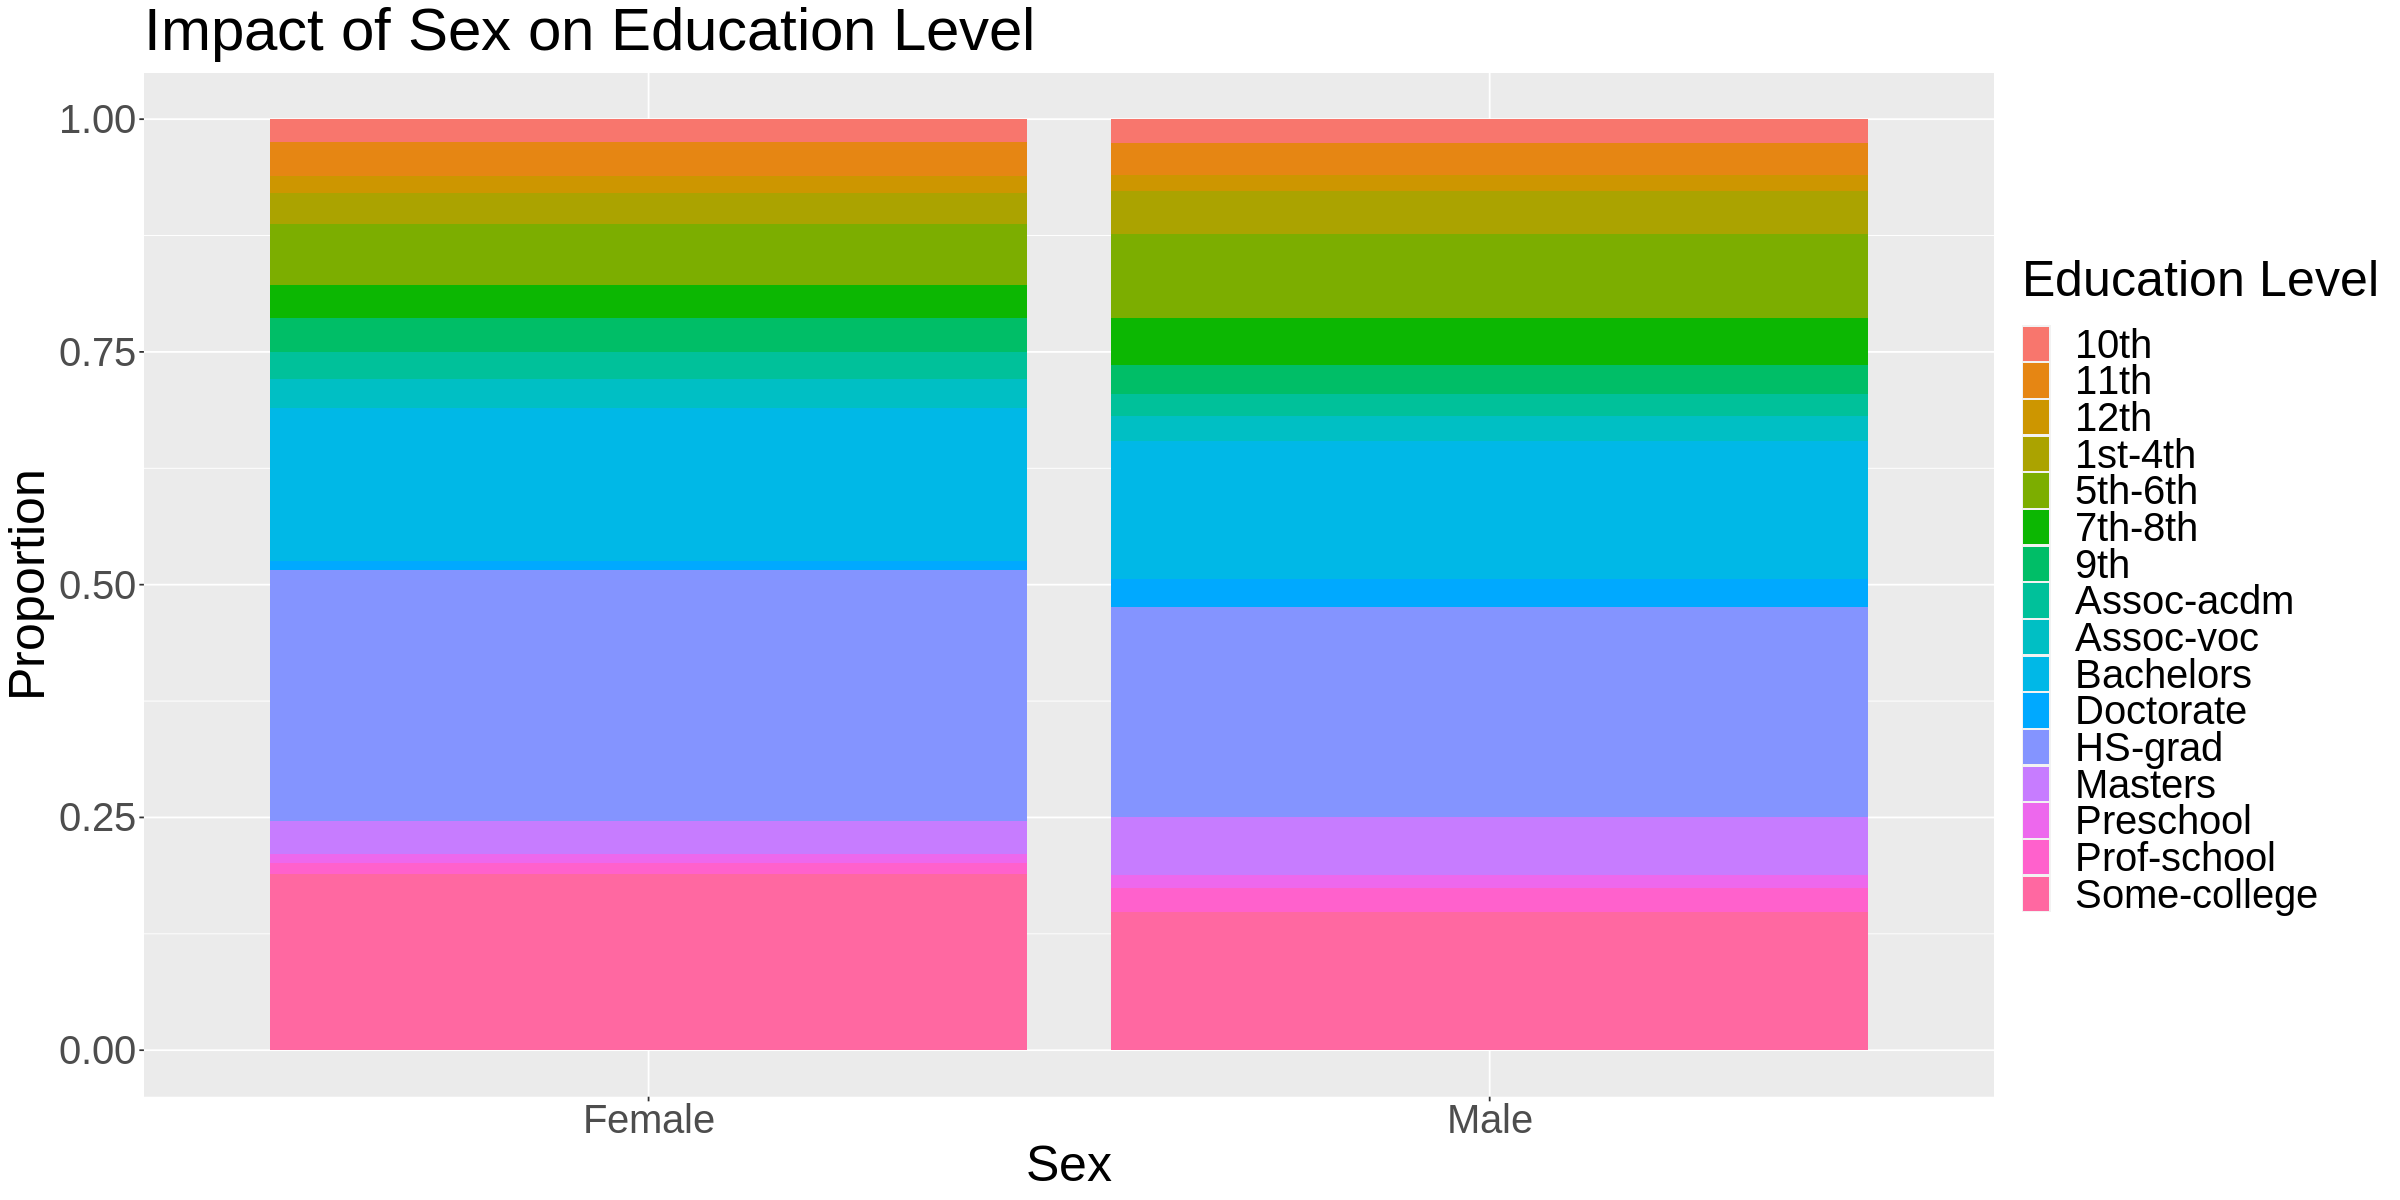

In [8]:
sex_education_plot

<center>Figure 1. Scaled and balanced bar graph of Sex vs Education Level</center>

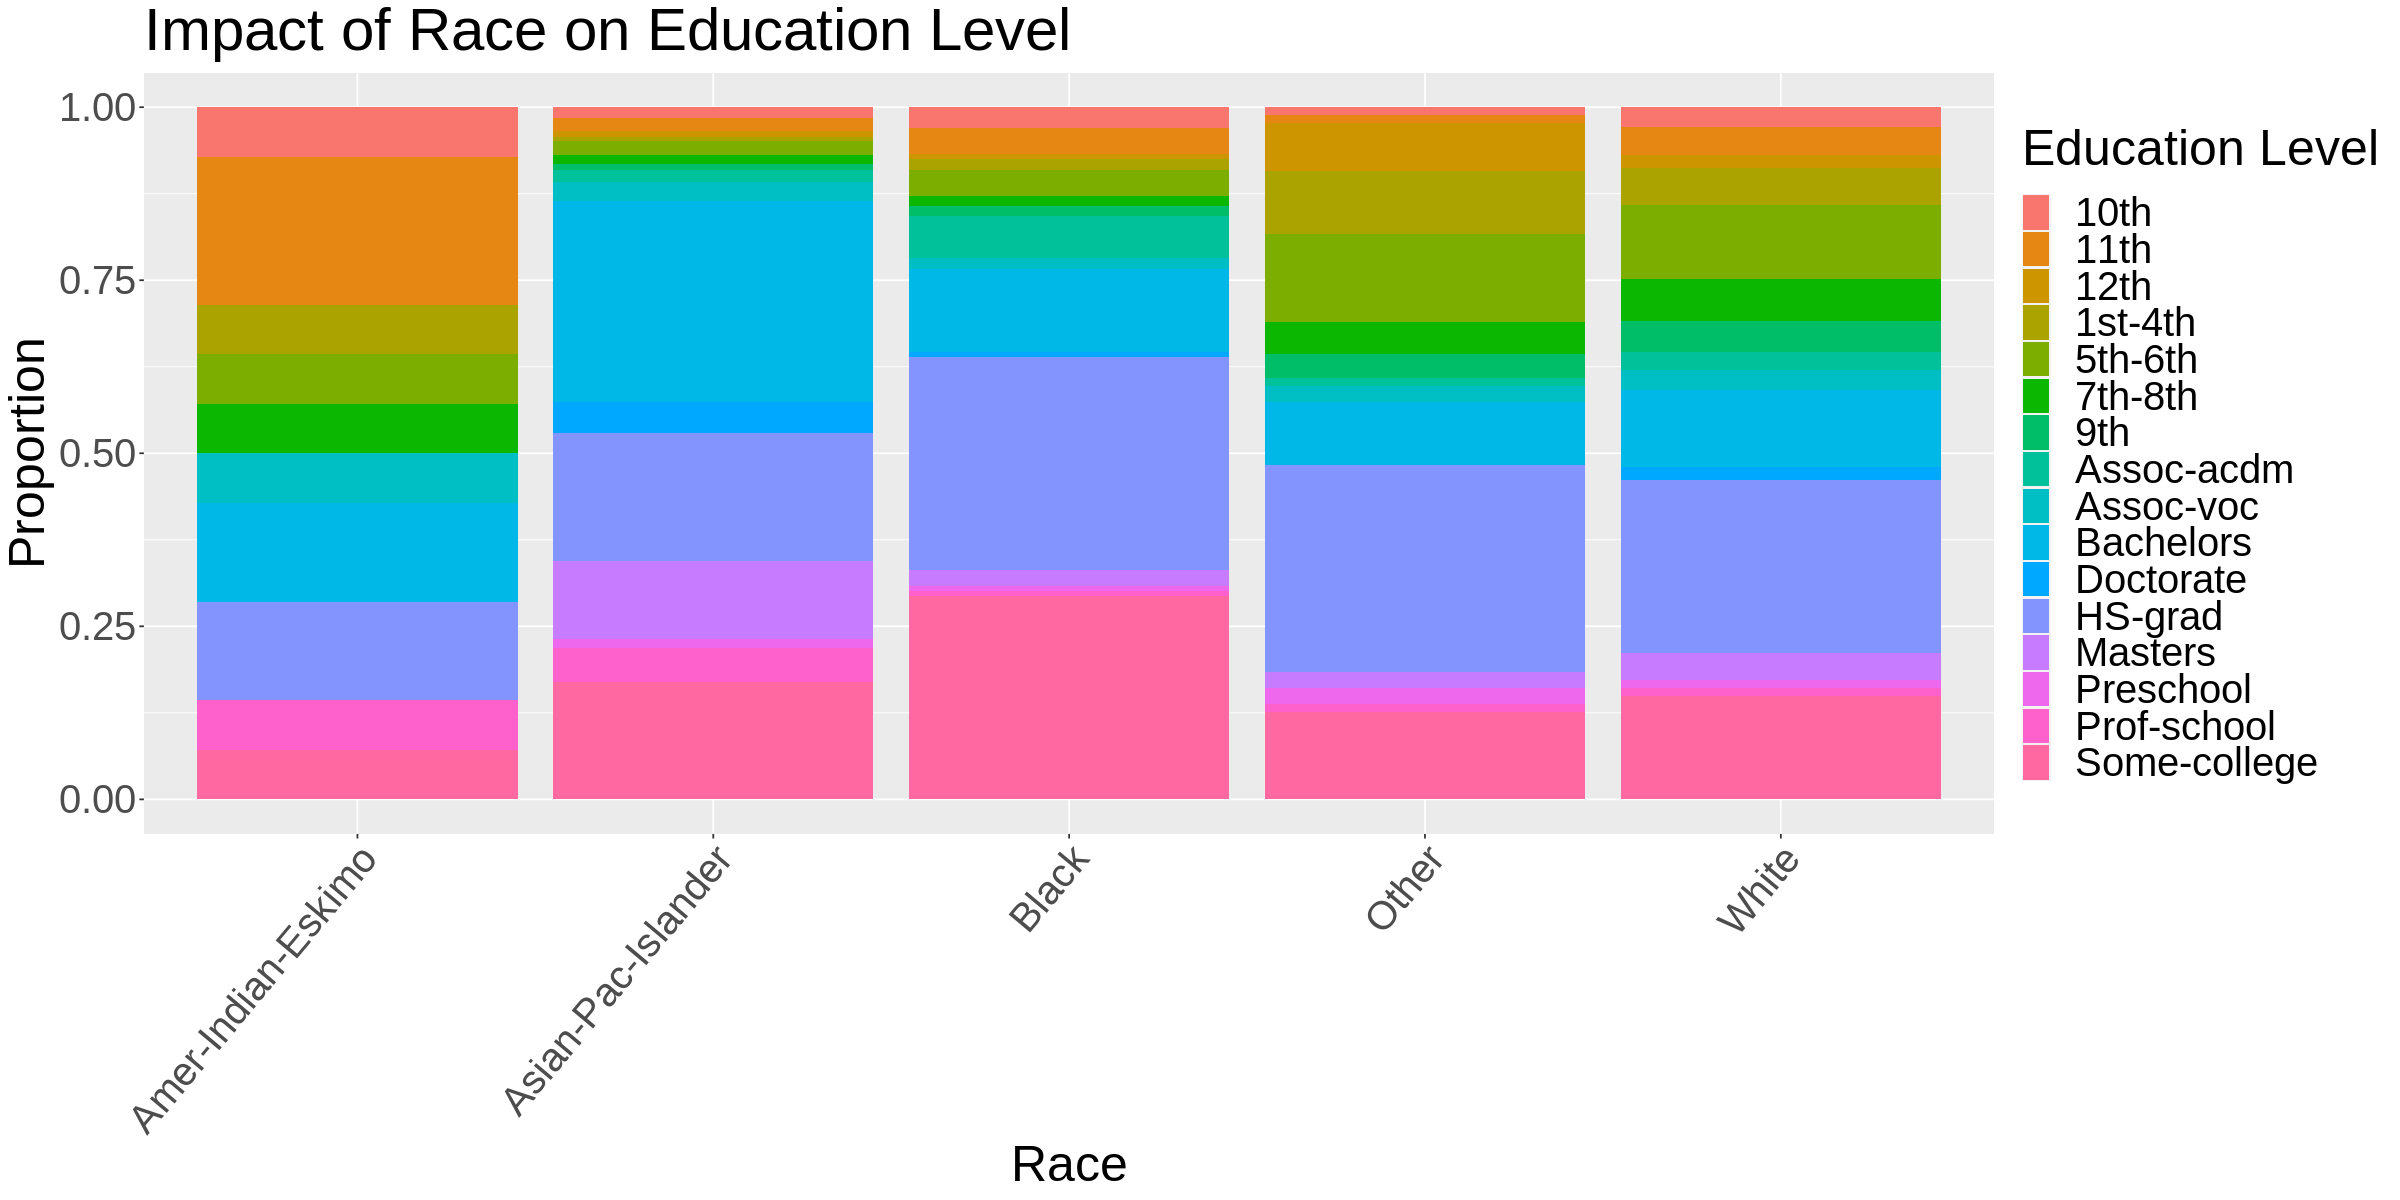

In [9]:
race_education_plot

<center>Figure 2. Scaled and balanced bar graph of Race vs Education Level</center>

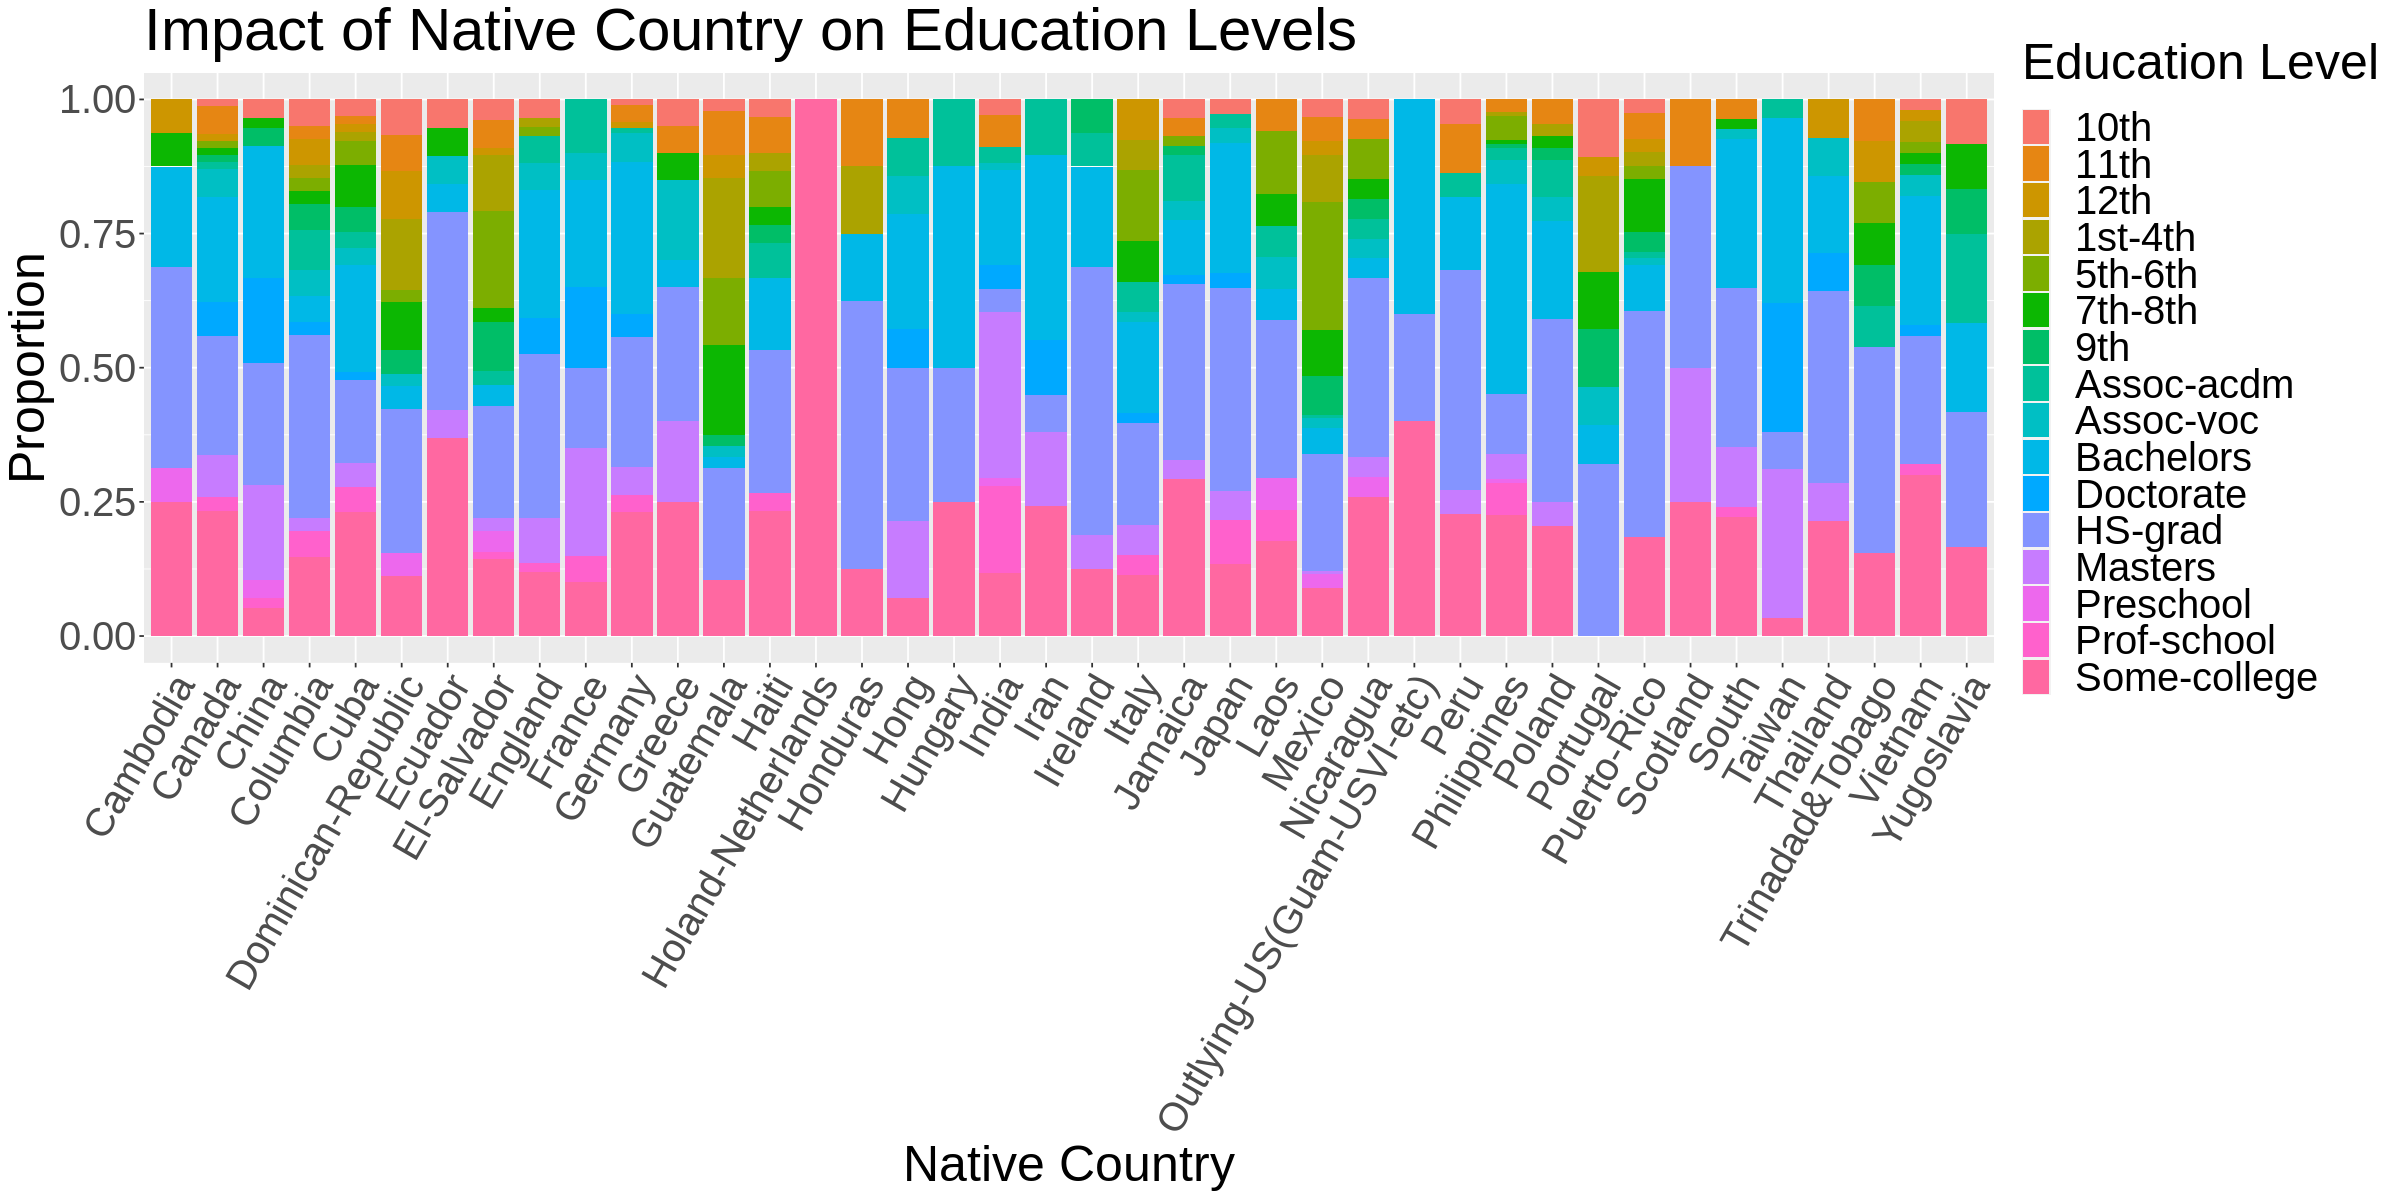

In [10]:
country_education_plot

<center>Figure 3. Scaled and balanced bar graph of Native Country vs Education Level</center>

<center><h2>Data Analysis: Create Recipe and KNN Initialization</h2></center>

In [11]:
# Loading data set from data file and selecting relevant columns

education_select <- education_data |>
                    filter(!(Native.country == "United-States"), !(Native.country == "?"), na.rm = TRUE) |>
                    select(Sex, Race, Native.country, Education.level) |>
                    mutate(Sex = as.factor(Sex), 
                           Native.country = as.factor(Native.country), 
                           Education.level = as.factor(Education.level),
                           Race = as.factor(Race))

# Reload and wrangle data for Cross validation
education_clean <- na.omit(education_select)

# Splitting data into training and testing sets
education_split <- initial_split(education_clean, prop = 0.70, strata = Education.level)
education_train <- training(education_split)
education_test <- testing(education_split)

In [12]:
# Creating recipe and knn fit model
education_recipe <- recipe(Education.level ~., data = education_train) |>
                    step_dummy(all_nominal(), -all_outcomes())

# 5-fold cross-validation on training set
education_vfold <- vfold_cv(education_train, v = 5, strata = Education.level)


# # KNN tuning using neighbors = tune()
edu_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

# kvals to process
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

In [13]:
edu_knn_results <- workflow() |>
                   add_recipe(education_recipe) |>
                   add_model(edu_knn_spec) |>
                   tune_grid(resamples = education_vfold, grid = k_vals) |>
                   collect_metrics()

In [14]:
edu_knn_accuracies <- filter(edu_knn_results, .metric == 'accuracy')

In [15]:
cross_val_plot <- edu_knn_accuracies |>
                  ggplot(aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Neighbors", y = "Accuracy Estimate") +
                  theme(text = element_text(size = 20)) 

In [16]:
# Rebuild model using best chosen k

# Use k = 11
edu_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
                 set_engine("kknn") |>
                 set_mode("classification")

edu_best_fit <- workflow() |>
            add_recipe(education_recipe) |>
            add_model(edu_best_spec) |>
            fit(data = education_train) 

# Use Final Model to Predict on Test Dataset
education_predictions <- predict(edu_best_fit, education_test) |>
                         bind_cols(education_test)

education_metrics <- education_predictions |>
                     metrics(truth = Education.level, estimate = .pred_class)

# Create Confusion Matrix to check 
education_conf_mat <- education_predictions |>
                      conf_mat(truth = Education.level, estimate = .pred_class)

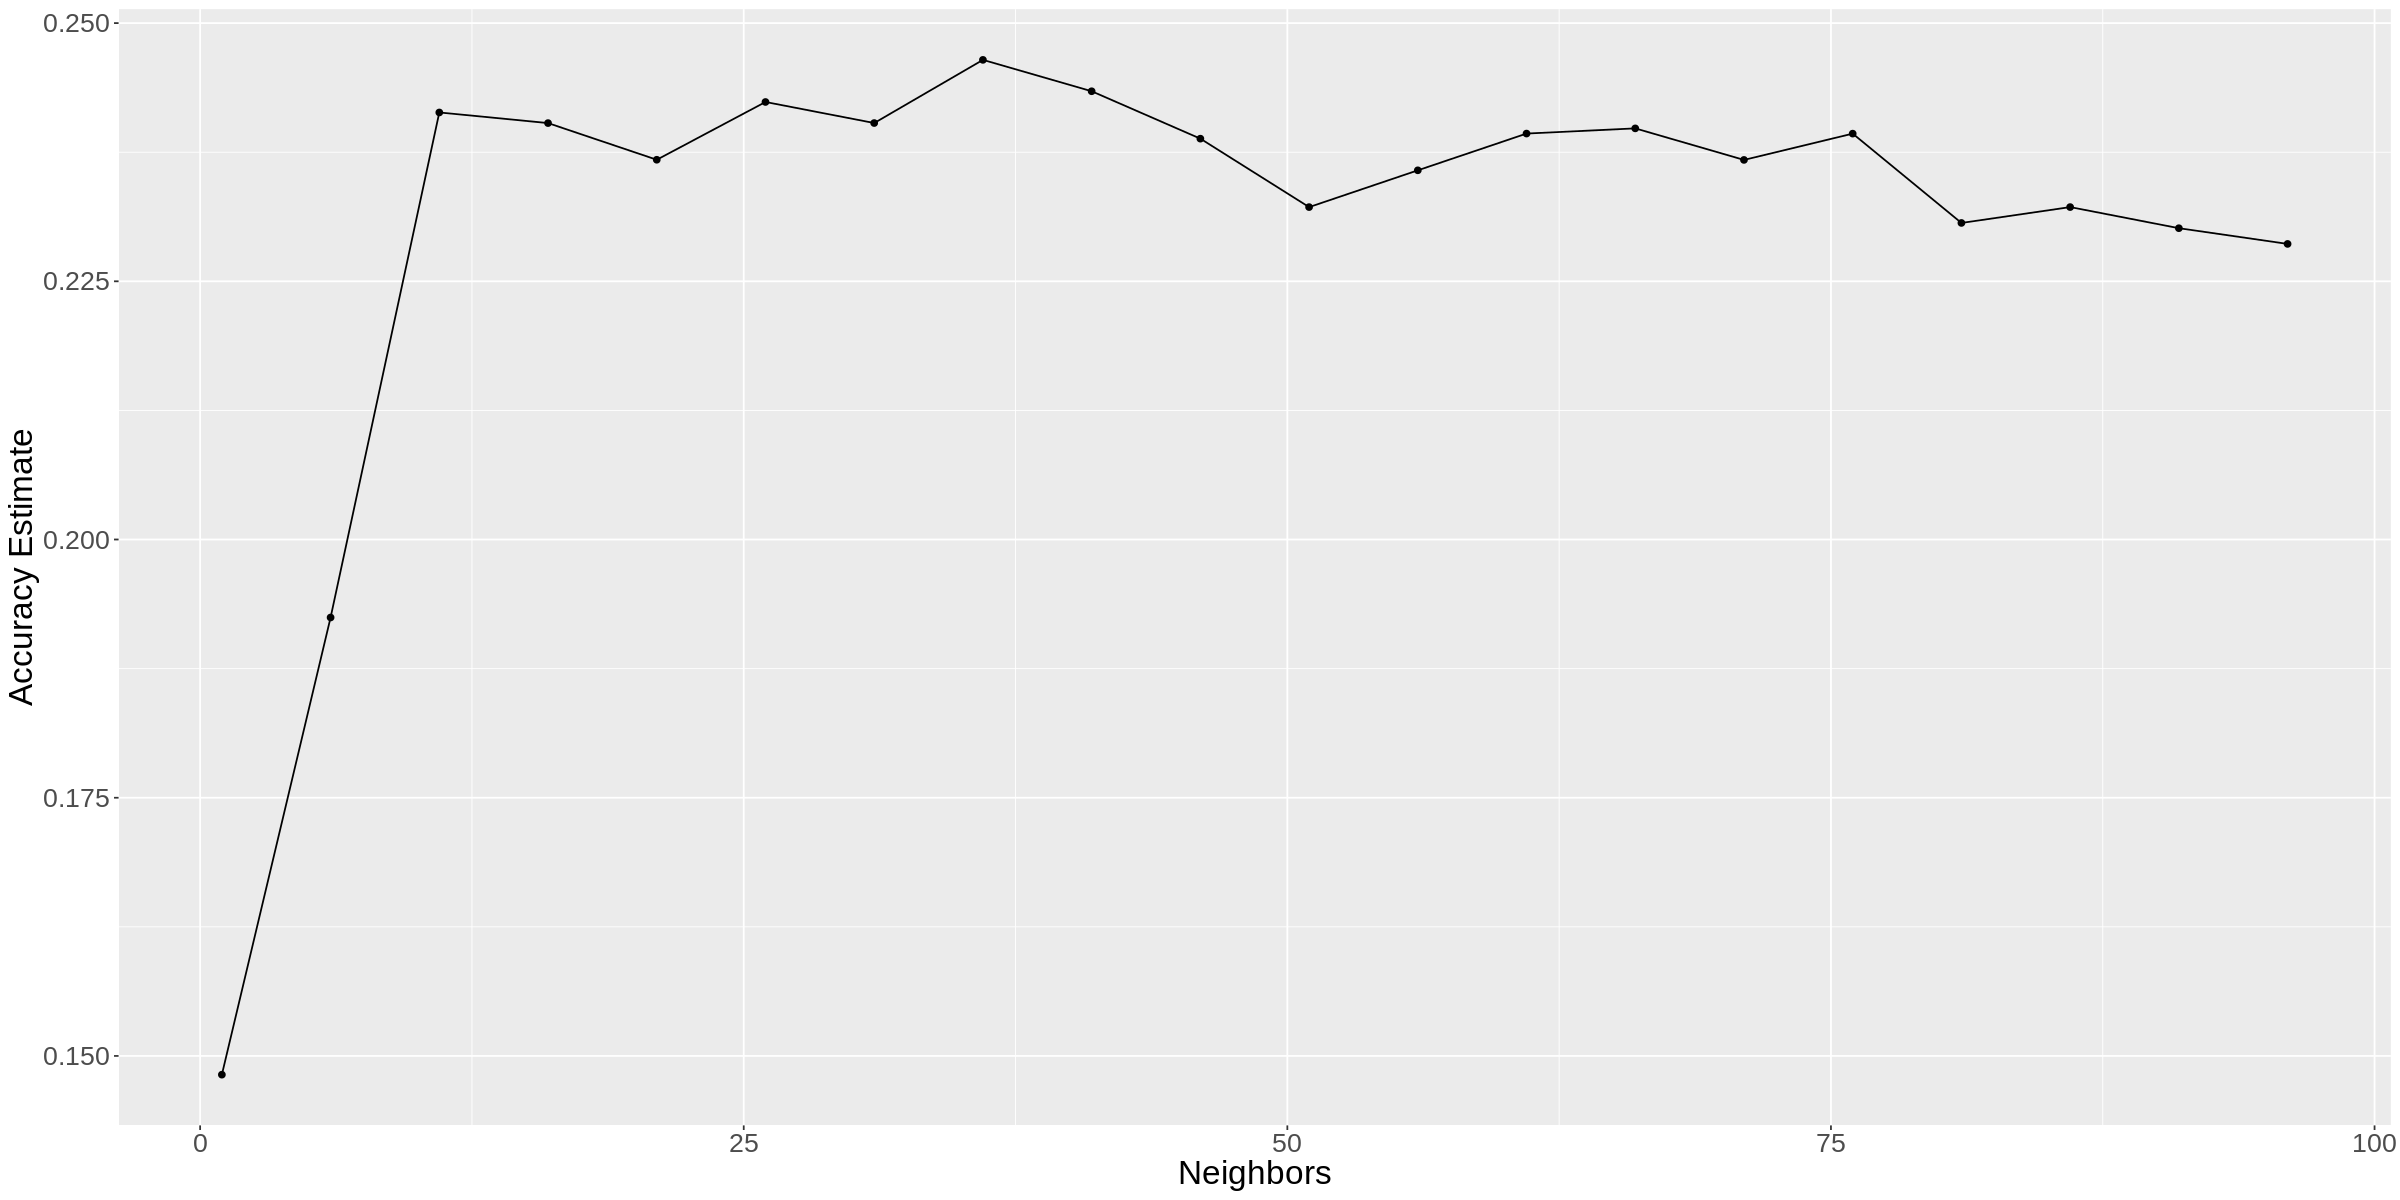

In [17]:
cross_val_plot

<center>Figure 4. Cross Validation K Vs Accuracy Estimate for best K (Choosing K = 11) K-nearest neighbour tuning for choosing best K seen at K = 11, minimal changes in accuracy when increasing or decreasing chosen K-nearest neighbor value.</center>

In [18]:
head(education_clean)

,Sex,Race,Native.country,Education.level
,<fct>,<fct>,<fct>,<fct>
1,Female,Black,Cuba,Bachelors
2,Female,Black,Jamaica,9th
3,Male,Asian-Pac-Islander,India,Bachelors
4,Male,Amer-Indian-Eskimo,Mexico,7th-8th
5,Male,Asian-Pac-Islander,South,Some-college
6,Male,White,Puerto-Rico,11th


<center>Table 4. Preview of wrangled data for Cross Validation</center>

In [19]:
glimpse(education_train)

Rows: 1,964
Columns: 4
$ Sex             <fct> Female, Female, Male, Female, Male, Female, Male, Fema…
$ Race            <fct> Black, White, White, Asian-Pac-Islander, White, White,…
$ Native.country  <fct> Cuba, Honduras, Cuba, Philippines, Poland, Columbia, I…
$ Education.level <fct> Bachelors, Prof-school, Bachelors, Bachelors, Bachelor…


In [20]:
glimpse(education_test)

Rows: 844
Columns: 4
$ Sex             <fct> Female, Male, Male, Male, Female, Male, Male, Female, …
$ Race            <fct> Black, Asian-Pac-Islander, Amer-Indian-Eskimo, White, …
$ Native.country  <fct> Jamaica, India, Mexico, Puerto-Rico, England, Germany,…
$ Education.level <fct> 9th, Bachelors, 7th-8th, 11th, Assoc-acdm, Bachelors, …


<center>Table 5. Training and testing sets</center>

In [21]:
edu_best_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 11
  weight_func = rectangular

Computational engine: kknn 


In [22]:
head(edu_best_fit)

$pre
$actions
$actions$recipe
$recipe
Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Dummy variables from all_nominal(), -all_outcomes()

$blueprint
Recipe blueprint: 
 
# Predictors: 0 
  # Outcomes: 0 
   Intercept: FALSE 
Novel Levels: FALSE 
 Composition: tibble 

attr(,"class")
[1] "action_recipe" "action_pre"    "action"       


$mold
$mold$predictors
# A tibble: 1,964 × 44
   Sex_Male Race_Asian.Pac.Is… Race_Black Race_Other Race_White Native.country_…
      <dbl>              <dbl>      <dbl>      <dbl>      <dbl>            <dbl>
 1        0                  0          1          0          0                0
 2        0                  0          0          0          1                0
 3        1                  0          0          0          1                0
 4        0                  1          0          0          0                0
 5        1                  0          0          0          1                0

<center>Table 6. Final Model Prediction on Education Level Testing Dataset Accuracy Score</center>

In [23]:
education_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.2523697
kap,multiclass,0.1073499


<center>Table 7. Final model prediction on Education Level</center>

In [24]:
education_conf_mat

              Truth
Prediction     10th 11th 12th 1st-4th 5th-6th 7th-8th 9th Assoc-acdm Assoc-voc
  10th            0    0    0       0       0       0   0          0         0
  11th            0    0    0       0       0       0   0          0         0
  12th            0    0    0       0       0       0   0          0         0
  1st-4th         0    0    2       2       0       3   1          0         0
  5th-6th         7    2    3      16      44      18  14          3         0
  7th-8th         0    0    0       0       0       0   0          0         0
  9th             0    0    0       0       0       0   0          0         0
  Assoc-acdm      0    0    0       0       0       1   0          0         0
  Assoc-voc       1    0    0       1       0       0   1          0         1
  Bachelors       4   11    1       9      25       9   9         12        13
  Doctorate       0    0    0       0       0       0   0          0         0
  HS-grad         4    6    1   

<center>Table 8. Confusion Matrix Classifier Predictions vs. Truth Label</center>

<center><h2>Discussion</h2></center>

Table 1. demonstrates a preview of the dataset we’ve chosen to work with. We have selected only the variables we want to work with. Additionally, we removed any rows with an “N/A” value and removed any rows that contained “United States” since such a large amount of the data consisted of the states, it would have been biased. Seeing the categories we are working with, we knew to use KNN classification. This is because we are trying to predict a categorical variable, Education Level, rather than a numerical variable (which we would then use regression for).

Figure 1. shows the distribution of the impact of sex on education level. Except for the proportion of  HS-grad and Some-college in female is slightly higher than the proportion of HS-grad and Some-college in male, the proportion of education level in female is almost the same as the proportion of education level in male, which shows that sex has only a slight impact on education level.

Figure 2. shows the distribution of the impact of race on education level. A significant number of individuals, despite their race, only achieve up to a high school diploma or less. This has a cascading effect on achieving higher level education. We can see only a small portion of individuals achieve a higher degree such as a Masters or Doctorate. A significant number of Amer-Indian-Eskimo individuals do not go past the 12th grade in comparison to other races (this may be an outlier).

Figure 3. shows the distribution of the impact of native country on education level. We can see that in most native countries, the proportion of people with HS-grad or Bachelors education level is the largest. Among all native countries, the people with native countries of China, France, Hong, India, Iran and Taiwan have a higher proportion in Master or higher education level than the people with other native countries.

From Table 7., we can see that using K-nearest neighbor classification tuned with the best K chosen at k = 11, the accuracy score was estimated to be at 0.2523697. This is quite a low estimation accuracy for the classifier. 

According to the confusion matrix in Table 8, using a k value of 11, our model correctly predicted 0 people to be in Doctorate, 0 people to be in Masters, and 103 people to be in Bachelors. We are specifically looking at Doctorate, Masters and Bachelor degrees because we want to determine which races, sexes and native countries have the highest education levels. This will allow us to see any trends in groups with high degree levels and thus answer our question. Using that idea we can conclude that our expected outcome was correct because we were able to predict education level based on these factors. It was predicted that 415 individuals achieved a Bachelor's degree when it was only 103. Moreover, we can see that 0 individuals achieved a Masters or Doctorate leading us to conclude that higher education is less accessible to all people regardless of sex, race, and native country. Overall including all of the education levels, our model predicted a total of 213 education levels correctly and 641 education levels incorrectly, giving it about a 25% accuracy.

To go into more detail of Table 8. above, although many predictions were inaccurate, they were still within range of that actual education level. For example, 312 individuals were incorrectly predicted to have their Bachelors. However, of the 312, 217 people were predicted to have some sort of education past high school (Associate, Masters, Doctorate etc). This can also be said about many of the other predictions.

We did not expect such a low accuracy rate in our prediction model. Since the accuracy score is so low, we will not be able to accurately answer our question from the beginning. Since we are not able to accurately answer our question based on our prediction model we will make assumptions based on past research. Historically, marginalized groups have less access to higher education based on the factors we are looking at (Sex, Race, Native Country). There are many implications of sex, race, and native country when it comes to opportunities in society, especially when it comes to education. Based on past research, these findings can help close the gap between sex, race, and native country affecting people from achieving higher education. Some future questions this could potentially lead to is, how can we close this gap in education level? What can be done to make education more accessible to all people no matter their sex, race, or native country? We hope to utilize these findings to answer future questions regarding issues of inequality in education and more. 


<center><h2>Work Cited</h2></center>

Cybercom. (n.d.). Gender and educational attainment. Sida. Retrieved November 29, 2022, from https://www.sida.se/en/publications/gender-and-educational-attainment 

Educational attainment, by race and ethnicity. Race and Ethnicity in Higher Education. (2020, September 10). Retrieved November 29, 2022, from https://www.equityinhighered.org/indicators/u-s-population-trends-and-educational-attainment/educational-attainment-by-race-and-ethnicity/ 

Herd, P., Freese, J., Sicinski, K., Domingue, B. W., Mullan Harris, K., Wei, C., &amp; Hauser, R. M. (2019). Genes, gender inequality, and educational attainment. American Sociological Review, 84(6), 1069–1098. https://doi.org/10.1177/0003122419886550 

Most Educated Countries 2022. Most educated countries 2022. (n.d.). Retrieved November 29, 2022, from https://worldpopulationreview.com/country-rankings/most-educated-countries 

<center><h3> Thank you Ding for helping us figure out our project! Much appreciated! </h3></center>